In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_samples, silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Churn_Cleaned1.csv')
print(df.shape)
df.head()

(161, 43)


,Timestamp,Email address,Name,age,gender,Area,Marital status,Qualification,Employment status,Annual Income,...,most_useful_feat,reason_subsc,likely_reco,cont_using,other_attempt,reason_other_attempt,improve_sugg,aware_discount,loyalty_prog,pur_promo_eff
0,10/26/2023 20:01:22,arushi669@gmail.com,Arushi Nagpal,25-34,Female,City,Single,Master's degree,Employed,5-10 lacs per annum,...,User-Friendly Interface:The easy-to-use and in...,Free fast delivery options,Very Likely,5,Yes,NaN,NaN,Yes,Yes,Moderately
1,10/26/2023 20:15:14,divyajain04196@gmail.com,Divya,25-34,Female,City,Single,Master's degree,Unemployed,Not applicable,...,User-Friendly Interface:The easy-to-use and in...,Video streaming,Likely,4,Yes,NaN,NaN,No,Maybe,Slightly
2,10/26/2023 20:21:36,sanadktiwari@gmail.com,Sanad,25-34,Male,City,Single,Master's degree,Student,Not applicable,...,User-Friendly Interface:The easy-to-use and in...,Video streaming,Neutral,5,No,NaN,NaN,No,No,Not at all
3,10/26/2023 20:22:02,deeptisoni1997@gmail.com,Deepti soni,15-24,Female,City,Married,Master's degree,Employed,I do not wish to disclose,...,User-Friendly Interface:The easy-to-use and in...,"Not Applicable, I am not a prime member",Neutral,3,Yes,NaN,NaN,No,Maybe,Moderately
4,10/26/2023 20:25:26,shivamrai.du.or.20@gmail.com,Shivam Rai,25-34,Male,City,Single,Master's degree,Employed,I do not wish to disclose,...,Features and Functionality: The range of featu...,Video streaming,Neutral,3,No,NaN,NaN,Yes,Yes,Moderately


In [3]:
df_rfm=df.copy()

In [4]:
df_recency = df_rfm.groupby(by='Email address',as_index=False)['last_ordered'].max()
df_recency.columns = ['Email address', 'Recency']
df_recency.head()

,Email address,Recency
0,12jatinsehrawat@gmail.com,30
1,21manishmishra@gmail.com,7
2,aagiakash2000@gmail.com,1
3,aayushi.hld@gmail.com,90
4,adiruhela143@gmail.com,9


In [5]:
print(df['Freq_usage'].to_list())

['Very Frequently (Several times a week)', 'Occasionally (A few times a month)', 'Frequently (About once a week)', 'Occasionally (A few times a month)', 'Occasionally (A few times a month)', 'Frequently (About once a week)', 'Frequently (About once a week)', 'Occasionally (A few times a month)', 'Frequently (About once a week)', 'Frequently (About once a week)', 'Rarely (Once a month or less)', 'Occasionally (A few times a month)', 'Occasionally (A few times a month)', 'Rarely (Once a month or less)', 'Very Frequently (Several times a week)', 'Frequently (About once a week)', 'Rarely (Once a month or less)', 'Frequently (About once a week)', 'Rarely (Once a month or less)', 'Rarely (Once a month or less)', 'Very Frequently (Several times a week)', 'Occasionally (A few times a month)', 'Occasionally (A few times a month)', 'Occasionally (A few times a month)', 'Occasionally (A few times a month)', 'Rarely (Once a month or less)', 'Very Frequently (Several times a week)', 'Rarely (Once a

In [6]:
print(df['Freq_usage'].value_counts())

Occasionally (A few times a month)                        60
Rarely (Once a month or less)                             42
Frequently (About once a week)                            32
Very Frequently (Several times a week)                    24
Never (I don't use e-commerce platforms for purchases)     3
Name: Freq_usage, dtype: int64


In [7]:
frequency_mapping = {'Very Frequently (Several times a week)': 5, 'Frequently (About once a week)': 4, 'Occasionally (A few times a month)': 3, 'Rarely (Once a month or less)': 2, "Never (I don't use e-commerce platforms for purchases)": 1}
a= df_rfm['Freq_usage'] = df_rfm['Freq_usage'].map(frequency_mapping)

In [8]:
print(df_rfm['Freq_usage'].value_counts())

3    60
2    42
4    32
5    24
1     3
Name: Freq_usage, dtype: int64


In [9]:
frequency_df = df_rfm.drop_duplicates().groupby(
    by=['Email address'], as_index=False)['Freq_usage'].max()
frequency_df.columns = ['Email address', 'Frequency']
frequency_df.head()

,Email address,Frequency
0,12jatinsehrawat@gmail.com,2
1,21manishmishra@gmail.com,5
2,aagiakash2000@gmail.com,3
3,aayushi.hld@gmail.com,3
4,adiruhela143@gmail.com,3


In [10]:
monetary_df = df.groupby(by='Email address', as_index=False)['yearly_spend'].sum()
monetary_df.columns = ['Email address', 'Monetary']
monetary_df.head()

,Email address,Monetary
0,12jatinsehrawat@gmail.com,4000
1,21manishmishra@gmail.com,100000
2,aagiakash2000@gmail.com,9600
3,aayushi.hld@gmail.com,5000
4,adiruhela143@gmail.com,150000


In [11]:
rf_df = df_recency.merge(frequency_df, on='Email address')
rfm_df = rf_df.merge(monetary_df, on='Email address')
rfm_df.head()

,Email address,Recency,Frequency,Monetary
0,12jatinsehrawat@gmail.com,30,2,4000
1,21manishmishra@gmail.com,7,5,100000
2,aagiakash2000@gmail.com,1,3,9600
3,aayushi.hld@gmail.com,90,3,5000
4,adiruhela143@gmail.com,9,3,150000


In [12]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df.head()

,Email address,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,12jatinsehrawat@gmail.com,30,2,4000,23.510972,16.387960,15.217391
1,21manishmishra@gmail.com,7,5,100000,57.680251,100.000000,92.857143
2,aagiakash2000@gmail.com,1,3,9600,94.043887,50.501672,46.894410
3,aayushi.hld@gmail.com,90,3,5000,9.404389,50.501672,46.894410
4,adiruhela143@gmail.com,9,3,150000,50.470219,50.501672,46.894410


In [28]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 *rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['Email address', 'RFM_Score']].head(7)


,Email address,RFM_Score
0,12jatinsehrawat@gmail.com,0.84
1,21manishmishra@gmail.com,4.48
2,aagiakash2000@gmail.com,2.75
3,aayushi.hld@gmail.com,2.11
4,adiruhela143@gmail.com,2.42
5,aditi.du.or.20@gmail.com,2.35
6,aditya.alok711@gmail.com,2.18


In [ ]:
# rfm score >4.5 : Top Customer
# 4.5 > rfm score > 4 : High Value Customer
# 4>rfm score >3 : Medium value customer
# 3>rfm score>1.6 : Low-value customer
# rfm score<1.6 :Lost Customer

In [17]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] > 4.5, "Top Customers", 
							(np.where(rfm_df['RFM_Score'] > 4,"High value Customer",
							(np.where(rfm_df['RFM_Score'] > 3,"Medium Value Customer",
							np.where(rfm_df['RFM_Score'] > 1.6,'Low Value Customers', 'Lost Customers'))))))
rfm_df[['Email address', 'RFM_Score', 'Customer_segment']].head(20)


,Email address,RFM_Score,Customer_segment
0,12jatinsehrawat@gmail.com,0.84,Lost Customers
1,21manishmishra@gmail.com,4.48,High value Customer
2,aagiakash2000@gmail.com,2.75,Low Value Customers
3,aayushi.hld@gmail.com,2.11,Low Value Customers
4,adiruhela143@gmail.com,2.42,Low Value Customers
5,aditi.du.or.20@gmail.com,2.35,Low Value Customers
6,aditya.alok711@gmail.com,2.18,Low Value Customers
7,advprabhat@gmail.com,3.99,Medium Value Customer
8,adwityakumar10@gmail.com,3.62,Medium Value Customer
9,agrawaladityaraj97@gmail.com,3.94,Medium Value Customer


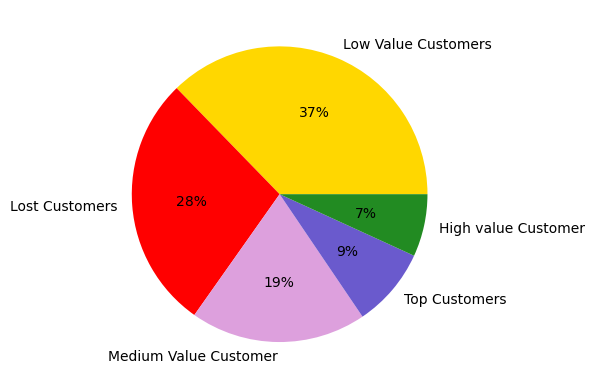

In [26]:
#to plot the segment of customers
colors = ['gold', 'r', 'plum', 'slateblue', 'forestgreen']
plt.pie(rfm_df['Customer_segment'].value_counts(),
        labels=rfm_df['Customer_segment'].value_counts().index,
        autopct='%.0f%%',
        colors=colors)
plt.show()